In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
import seaborn as sns
import pandas as pd 


In [18]:
# Set time period
start_winter_2021 = datetime(2021, 11, 1)
end_winter_2021 = datetime(2022, 4, 30)

start_winter_2022 = datetime(2022, 10, 1)
end_winter_2022 = datetime.today()

In [3]:
# Create Point for Berlin

location_istanbul = Point(41.01, 28.94, 70)
location_berlin = Point(52.5,13.4, 70)

In [19]:
data_winter_2021_berlin = Daily(location_berlin, start_winter_2021, end_winter_2021)
data_winter_2021_berlin = data_winter_2021_berlin.fetch()

data_winter_2021_istanbul = Daily(location_istanbul, start_winter_2021, end_winter_2021)
data_winter_2021_istanbul = data_winter_2021_istanbul.fetch()

In [5]:
data_winter_2022_berlin = Daily(location_berlin, start_winter_2022, end_winter_2022)
data_winter_2022_berlin = data_winter_2022_berlin.fetch()

data_winter_2022_istanbul = Daily(location_istanbul, start_winter_2022, end_winter_2022)
data_winter_2022_istanbul = data_winter_2022_istanbul.fetch()

In [6]:
data_winter_2022_berlin.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-10-01,9.6,6.5,11.8,2.8,0.0,198.0,16.7,38.9,1007.5,21.0
2022-10-02,11.9,9.8,14.6,2.0,0.0,269.0,19.1,44.5,1012.8,408.0
2022-10-03,12.0,9.8,14.7,0.0,0.0,296.0,20.2,48.2,1020.2,160.0
2022-10-04,12.4,10.0,15.6,0.0,0.0,262.0,13.1,31.5,1021.3,308.0
2022-10-05,12.9,8.2,18.2,0.0,0.0,207.0,14.8,33.3,1017.7,399.0


<AxesSubplot:xlabel='time'>

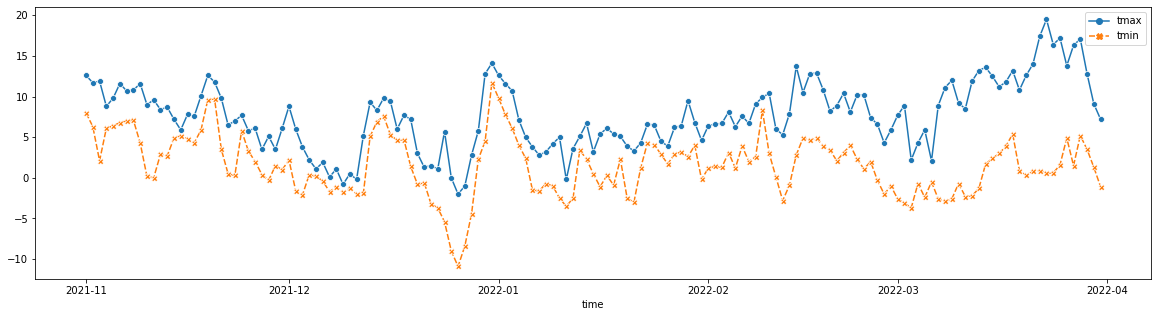

In [7]:
plt.figure(figsize=(20,5))
sns.lineplot(data=data_winter_2021_berlin[['tmax','tmin']], markers = True)

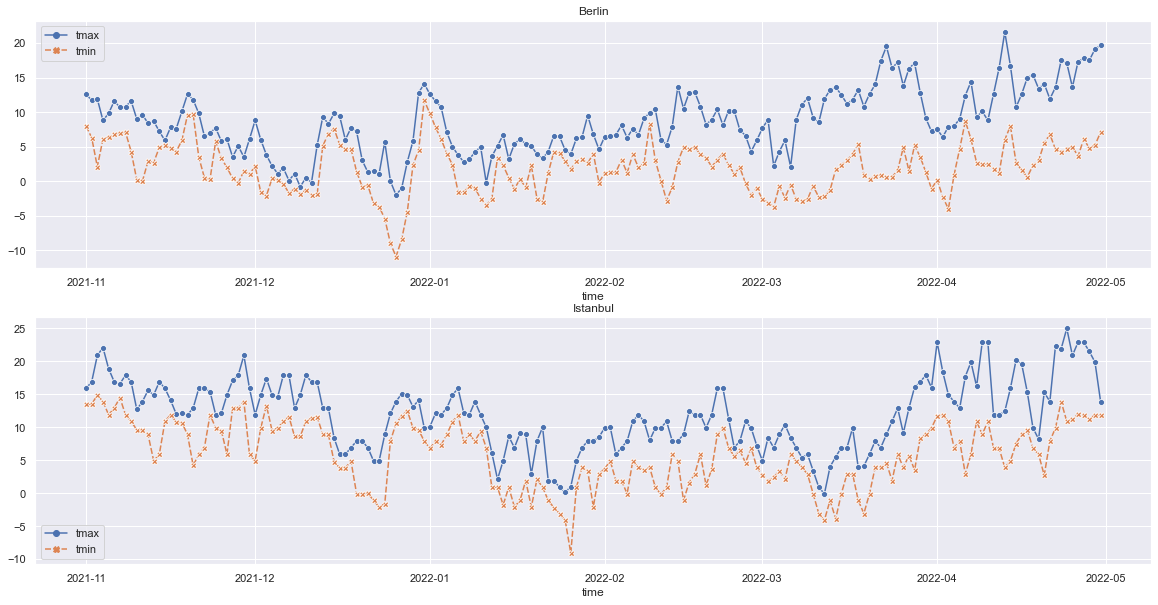

In [20]:
fig, ax =plt.subplots(2,1)
sns.set(rc={'figure.figsize':(20,10)})


sns.lineplot(data=data_winter_2021_berlin[['tmax','tmin']], markers = True, ax = ax[0]).set(title = 'Berlin')
sns.lineplot(data=data_winter_2021_istanbul[['tmax','tmin']], markers = True, ax = ax[1]).set(title = 'Istanbul')
fig.show()

In [78]:
hourly_data = Hourly(location_berlin, start_winter_2021, end_winter_2021)
hourly_data = hourly_data.fetch()
hourly_data.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2021-11-01 00:00:00,10.7,5.7,71.0,0.0,0.0,140.0,13.7,25.0,1002.4,0.0,2.0
2021-11-01 01:00:00,10.0,5.6,74.0,0.0,NaN,140.0,16.2,27.0,1001.8,0.0,2.0
2021-11-01 02:00:00,9.4,5.6,77.0,0.0,NaN,140.0,15.1,23.0,1001.2,0.0,2.0
2021-11-01 03:00:00,9.1,5.5,78.0,0.0,NaN,140.0,13.3,25.0,1000.6,0.0,2.0
2021-11-01 04:00:00,8.7,5.3,79.0,0.0,NaN,150.0,13.3,23.0,1000.3,0.0,2.0


In [79]:
hourly_data['hour'] = hourly_data.index.hour
hourly_data_selected = hourly_data[hourly_data.hour.isin([8,15,20,0])]
hourly_data_selected = hourly_data_selected.reset_index()
hourly_data_selected['time'] = hourly_data_selected['time'].apply(pd.datetime.date)
hourly_data_selected['hour'] = hourly_data_selected['hour'].astype(str)
hourly_data_selected = hourly_data_selected.set_index('time')


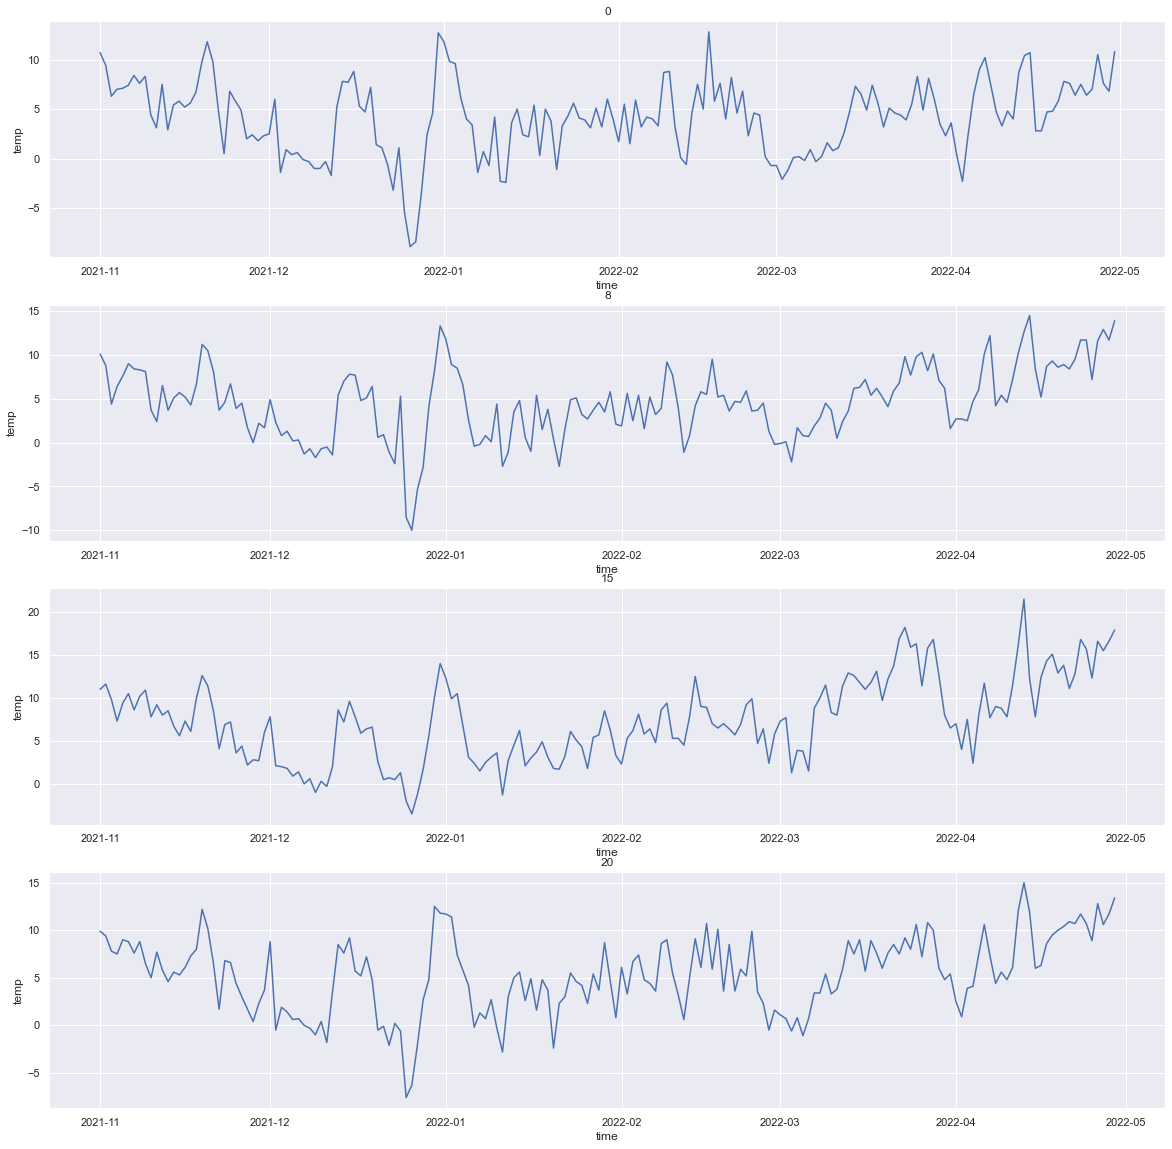

In [80]:
fig, ax =plt.subplots(4,1)
sns.set(rc={'figure.figsize':(20,20)})


sns.lineplot(data=hourly_data_selected[hourly_data_selected.hour == '0']['temp'], markers = True, ax = ax[0]).set(title = '0')
sns.lineplot(data=hourly_data_selected[hourly_data_selected.hour == '8']['temp'], markers = True, ax = ax[1]).set(title = '8')
sns.lineplot(data=hourly_data_selected[hourly_data_selected.hour == '15']['temp'], markers = True, ax = ax[2]).set(title = '15')
sns.lineplot(data=hourly_data_selected[hourly_data_selected.hour == '20']['temp'], markers = True, ax = ax[3]).set(title = '20')

fig.show()